In [ ]:
 !pip install shap
 !pip install pyod

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cur_path = "drive/MyDrive/Mafaulda_organizado/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv(cur_path+"experiment_one_class/data/no_balanced/train.csv",sep=";")

In [ ]:
df_test = pd.read_csv(cur_path+"experiment_one_class/data/balanced/test.csv",sep=";")

In [ ]:
df_train['target'].value_counts()

underhang                  441
overhang                   411
imbalance                  265
vertical-misalignment      249
horizontal-misalignment    158
normal                      36
Name: target, dtype: int64

In [ ]:
df_train = df_train[df_train['target'] == 'normal']

In [ ]:
df_test['target'].value_counts()

underhang                  117
overhang                   102
imbalance                   68
vertical-misalignment       52
horizontal-misalignment     39
normal                      13
Name: target, dtype: int64

In [ ]:
df_train['target'] = 0
df_test['target2'] = df_test['target2'].apply(lambda x : 0 if x == 'normal' else 1)

In [ ]:
df_test['target'].value_counts()

underhang                  117
overhang                   102
imbalance                   68
vertical-misalignment       52
horizontal-misalignment     39
normal                      13
Name: target, dtype: int64

In [ ]:
df_train['target'].value_counts()

0    36
Name: target, dtype: int64

In [ ]:
df_test['target2'].value_counts()

1    378
0     13
Name: target2, dtype: int64

In [ ]:
y_train = df_train['target']
X_train = df_train.drop(columns=['target'])

In [ ]:
y_test = df_test['target2']
X_test = df_test.drop(columns=['target', 'target2'])


 **Teste 1**: OCSVM






In [ ]:
from pyod.models.ocsvm import OCSVM
clf = OCSVM()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

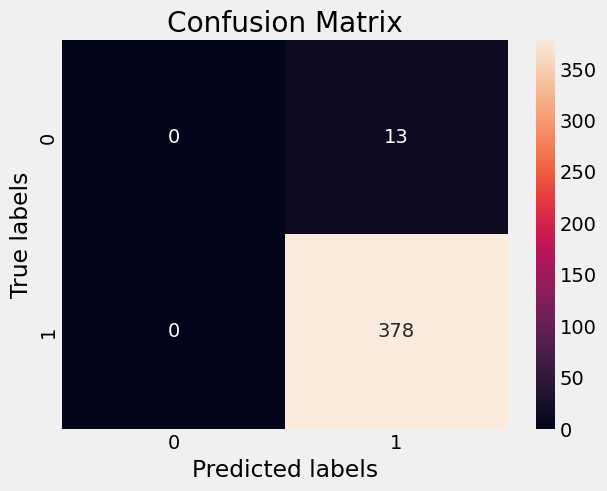

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
#ax.xaxis.set_ticklabels(['normal', 'anomalia']); ax.yaxis.set_ticklabels(['normal', 'anomalia']);


**Teste 2**  ECOD



In [ ]:
from pyod.models.ecod import ECOD
clf = ECOD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [ ]:
print("Confusion Matrix:\n", confusion)
print("Verdadeiros Positivos (TP):", TP)
print("Falsos Positivos (FP):", FP)
print("Verdadeiros Negativos (TN):", TN)
print("Falsos Negativos (FN):", FN)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

**Teste 3**  COPOD




In [ ]:
from pyod.models.copod import COPOD
clf = COPOD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 4** ABOD

**RODA** AUC = RUIM

In [ ]:
from pyod.models.abod import ABOD
clf = ABOD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 5** fastABOD  X





In [ ]:
from pyod.models.abod import ABOD
clf = ABOD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 6** MAD



In [ ]:
from pyod.models.mad import MAD
clf = MAD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 7** SOS



In [ ]:
from pyod.models.sos import SOS
clf = SOS()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 8** QMCD



In [ ]:
from pyod.models.qmcd import  QMCD
clf = QMCD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 9** KDE


In [ ]:
from pyod.models.kde import KDE
clf = KDE()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]


In [ ]:

print("Confusion Matrix:\n", confusion)
print("Verdadeiros Positivos (TP):", TP)
print("Falsos Positivos (FP):", FP)
print("Verdadeiros Negativos (TN):", TN)
print("Falsos Negativos (FN):", FN)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


**Teste 10** SAMPLING


In [ ]:
from pyod.models.sampling import Sampling
clf = Sampling()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 11** GMM


In [ ]:
from pyod.models.gmm import GMM
clf = GMM()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]


In [ ]:
print("Confusion Matrix:\n", confusion)
print("Verdadeiros Positivos (TP):", TP)
print("Falsos Positivos (FP):", FP)
print("Verdadeiros Negativos (TN):", TN)
print("Falsos Negativos (FN):", FN)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


**Teste 12** PCA



In [ ]:
from pyod.models.pca import PCA
clf = PCA()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]


In [ ]:
print("Confusion Matrix:\n", confusion)
print("Verdadeiros Positivos (TP):", TP)
print("Falsos Positivos (FP):", FP)
print("Verdadeiros Negativos (TN):", TN)
print("Falsos Negativos (FN):", FN)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


**Teste 13** KPCA


In [ ]:
from pyod.models.kpca import KPCA
clf = KPCA()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 14** MCD



In [ ]:
from pyod.models.mcd import MCD
clf = MCD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 14** CD

**NÃO RODA**

In [ ]:
from pyod.models.cd import CD
clf = CD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
houses = pd.read_csv("drive/MyDrive/Mafaulda_organizado/mafaulda_final.csv")
original_length = len(houses)
houses.head()

In [ ]:
houses.replace({"-": 0}, inplace=True)
houses["x_test"] = houses["x_test"].astype(int)
# Apart from this, there is no other potentially missing data in the dataset

# Only selecting numeric columns
houses = houses.select_dtypes(include=np.number)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 15** LMDD


In [ ]:
from pyod.models.lmdd import LMDD
clf = LMDD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:

print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 16** LOF



In [ ]:
from pyod.models.lof import LOF


clf = LOF()
clf.fit(X_train)

y_pred = clf.predict(X_test)

NameError: ignored

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 17** COF



In [ ]:
from pyod.models.cof import COF
clf = COF()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 18** CBLOF

**NÃO RODA**

In [ ]:
from pyod.models.cblof import CBLOF
clf = CBLOF()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 19** LOCI



In [ ]:
from pyod.models.loci import LOCI
clf = LOCI()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 20** HBOS



In [ ]:
from pyod.models.hbos import HBOS
clf = HBOS()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 21** KNN



In [ ]:
from pyod.models.knn import KNN
clf = KNN()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 22** AvgKNN


In [ ]:
from pyod.models.AVG_KNN import AVG_KNN
clf = AVG_KNN()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 23** SOD



In [ ]:
from pyod.models.sod import SOD
clf = SOD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 24** ROD



In [ ]:
from pyod.models.rod import ROD
clf = ROD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 24** IFOREST



In [ ]:
from pyod.models.iforest import IFOREST
clf = IFOREST()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 25** INNE

**NÃO RODA**

In [ ]:
from pyod.models.inne import INNE
clf = INNE()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 26** FB

**NÃO RODA**

In [ ]:
from pyod.models.fb import FB
clf = FB()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 26** LSCP

**NÃO RODA**

In [ ]:
from pyod.models.lscp import LSCP
clf = LSCP()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 27** XGBOD

**NÃO RODA**

In [ ]:
from pyod.models.xgbod import XGBOD
clf = XGBOD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 28** LODA

**NÃO RODA**

In [ ]:
from pyod.models.loda import LODA
clf = LODA()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 29** SUOD

**NÃO RODA**

In [ ]:
from pyod.models.suod import SUOD
clf = SUOD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 30** AUTOENCODER
**NÃO RODA**

In [ ]:
from pyod.models.auto_encoder import AUTO_ENCODER
clf = AUTO_ENCODER()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 31** VAE

**NÃO RODA**

In [ ]:
from pyod.models.vae import VAE
clf = VAE()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 32** BETA-VAE

**NÃO RODA**

In [ ]:
from pyod.models.betavae import BETAVAE
clf = BETAVAE()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 33** SO_GAAL

**NÃO RODA**

In [ ]:
from pyod.models.so_gaal import SO_GAAL
clf = SO_GAAL()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 34** MO_GAAL

**NÃO RODA**

In [ ]:
from pyod.models.mo_gaal import MO_GAAL
clf = MO_GAAL()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 35** DEEPSVDD

**NÃO RODA**

In [ ]:
from pyod.models.deep_svdd import DEEP_SVDD
clf = DEEP_SVDD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 36** ANOGAN

**NÃO RODA**

In [ ]:
from pyod.models.anogan import ANOGAN
clf = ANOGAN()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 37** ALAD

**NÃO RODA**

In [ ]:
from pyod.models.alad import ALAD
clf = ALAD()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

**Teste 38** R-GRAPH

**NÃO RODA**

In [ ]:
from pyod.models.rgraph import RGraph
clf = RGraph()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))

**Teste 39** LUNAR

**NÃO RODA**

In [ ]:
from pyod.models.lunar import LUNAR
clf = LUNAR()
clf.fit(X_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(auc(fpr, tpr))